In [1]:
import sklearn
import pandas as pd

def rename_checkpoint(df: pd.DataFrame, column_name: str):
    df[column_name] = df[column_name].str.replace("./", "", regex=False)
    df[column_name] = df[column_name].str.replace("/", "-", regex=False)
    df[column_name] = df[column_name].str.replace("_", "-", regex=False)


data_finetune = pd.read_csv("finetune_res.csv", sep="\t", header=None, names=["name", "finetune_result"])
rename_checkpoint(data_finetune, "name")
data_finetune

,name,finetune_result
0,bert-base-uncased,0.93900
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.93484
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.93164
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.92928
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.92856
...,...,...
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87840
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87900
71,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87840
72,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87824


In [2]:
from functools import partial
import json


def extract(name, data):
    data_dict = json.loads(data.replace("'", "\""))
    return data_dict[name]["acc"] / 100


data_probing = pd.read_csv("probing_results.csv", sep="\t", header=None, names=["name", "probing_result"])
for probing_ds in ['CR', 'MR', 'MPQA', 'SUBJ', 'SST2', 'SST5', 'Depth', 'Tense', 'Length']:
    data_probing[f"{probing_ds}_results"] = data_probing["probing_result"].map(partial(extract, probing_ds))

data_probing.drop("probing_result", axis=1, inplace=True)
rename_checkpoint(data_probing, "name")
data_probing

,name,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results,Depth_results,Tense_results,Length_results
0,bert-base-uncased,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584,0.3001,0.8835,0.5125
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385,0.2838,0.8855,0.5783
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.8450,0.7896,0.8663,0.9426,0.8342,0.4584,0.2823,0.8833,0.5830
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.8220,0.7720,0.8601,0.9356,0.8072,0.4330,0.2695,0.8740,0.5615
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.8212,0.7619,0.8576,0.9285,0.8127,0.4285,0.2819,0.8647,0.6332
...,...,...,...,...,...,...,...,...,...,...
67,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7571,0.7063,0.8341,0.9065,0.7474,0.3910,0.2803,0.7693,0.5376
68,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7558,0.7053,0.8336,0.9063,0.7446,0.3796,0.2806,0.7706,0.5281
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7597,0.7051,0.8332,0.9039,0.7386,0.3706,0.2783,0.7572,0.5866
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7526,0.7044,0.8328,0.8992,0.7463,0.3805,0.2857,0.7716,0.5341


In [3]:
import os
import pickle
import numpy as np

features_path = "attention_features"

names = os.listdir(features_path)
features = []
for name in names:
    file_path = f"{features_path}/{name}"
    with open(file_path, "rb") as file:
        model_features = np.load(file)
    features.append(model_features)

features = np.array(features)
features = features.mean(axis=-2)
data_attentions = pd.DataFrame({"name": names, "attention_features": features.tolist()})
rename_checkpoint(data_attentions, "name")
data_attentions

,name,attention_features
0,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-720,"[[[[264.0, 270.5, 270.75, 270.75, 270.75, 270...."
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.0, 270.5, 270.75, 270.75, 270.75, 270...."
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-560,"[[[[265.0, 270.5, 270.75, 270.75, 270.75, 270...."
...,...,...
67,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.5, 270.5, 270.75, 270.75, 270.75, 270...."
68,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.75, 270.75, 270.75, 270.75, 270.75, 27..."
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.25, 270.5, 270.75, 270.75, 270.75, 270..."
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.25, 270.5, 270.75, 270.75, 270.75, 270..."


In [4]:
df_final = pd.merge(data_finetune, data_probing, on="name")
df_final = pd.merge(df_final, data_attentions, on="name")
df_final

,name,finetune_result,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results,Depth_results,Tense_results,Length_results,attention_features
0,bert-base-uncased,0.93900,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584,0.3001,0.8835,0.5125,"[[[[267.0, 270.75, 270.75, 270.75, 270.75, 270..."
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.93484,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385,0.2838,0.8855,0.5783,"[[[[263.75, 270.5, 270.75, 270.75, 270.75, 270..."
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.93164,0.8450,0.7896,0.8663,0.9426,0.8342,0.4584,0.2823,0.8833,0.5830,"[[[[264.0, 270.5, 270.75, 270.75, 270.75, 270...."
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.92928,0.8220,0.7720,0.8601,0.9356,0.8072,0.4330,0.2695,0.8740,0.5615,"[[[[265.25, 270.5, 270.75, 270.75, 270.75, 270..."
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.92856,0.8212,0.7619,0.8576,0.9285,0.8127,0.4285,0.2819,0.8647,0.6332,"[[[[265.75, 270.5, 270.75, 270.75, 270.75, 270..."
...,...,...,...,...,...,...,...,...,...,...,...,...
67,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87888,0.7571,0.7063,0.8341,0.9065,0.7474,0.3910,0.2803,0.7693,0.5376,"[[[[266.0, 270.5, 270.75, 270.75, 270.75, 270...."
68,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87884,0.7558,0.7053,0.8336,0.9063,0.7446,0.3796,0.2806,0.7706,0.5281,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87840,0.7597,0.7051,0.8332,0.9039,0.7386,0.3706,0.2783,0.7572,0.5866,"[[[[266.25, 270.75, 270.75, 270.75, 270.75, 27..."
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.87900,0.7526,0.7044,0.8328,0.8992,0.7463,0.3805,0.2857,0.7716,0.5341,"[[[[265.25, 270.5, 270.75, 270.75, 270.75, 270..."


In [5]:
from sklearn.model_selection import train_test_split


X = df_final.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df_final["finetune_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
display(X)
display(y)

,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results,Depth_results,Tense_results,Length_results
0,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584,0.3001,0.8835,0.5125
1,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385,0.2838,0.8855,0.5783
2,0.8450,0.7896,0.8663,0.9426,0.8342,0.4584,0.2823,0.8833,0.5830
3,0.8220,0.7720,0.8601,0.9356,0.8072,0.4330,0.2695,0.8740,0.5615
4,0.8212,0.7619,0.8576,0.9285,0.8127,0.4285,0.2819,0.8647,0.6332
...,...,...,...,...,...,...,...,...,...
67,0.7571,0.7063,0.8341,0.9065,0.7474,0.3910,0.2803,0.7693,0.5376
68,0.7558,0.7053,0.8336,0.9063,0.7446,0.3796,0.2806,0.7706,0.5281
69,0.7597,0.7051,0.8332,0.9039,0.7386,0.3706,0.2783,0.7572,0.5866
70,0.7526,0.7044,0.8328,0.8992,0.7463,0.3805,0.2857,0.7716,0.5341


0     0.93900
1     0.93484
2     0.93164
3     0.92928
4     0.92856
       ...   
67    0.87888
68    0.87884
69    0.87840
70    0.87900
71    0.87840
Name: finetune_result, Length: 72, dtype: float64

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

grid_params = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
}
reg_no_topoligical = GridSearchCV(Lasso(), grid_params, cv=5, verbose=False, scoring="r2")

res_no_topoligical = reg_no_topoligical.fit(X_train, y_train)
print(f"Best params: {res_no_topoligical.best_params_}")
print(f"Best score: {res_no_topoligical.best_score_}")

Best params: {'alpha': 1e-05}
Best score: 0.8905000755765972


Kendall rank coef: 0.752


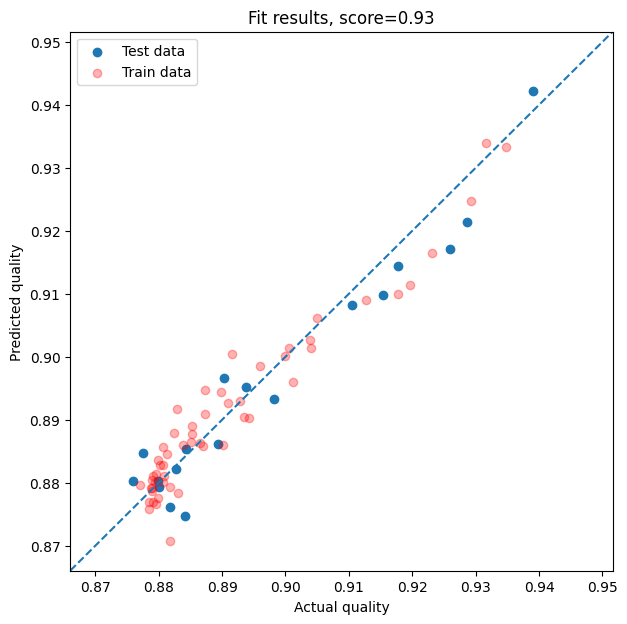

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import kendalltau


def plot_results(y_true, y_pred, y_true_train=None, y_pred_train=None):
    minn = min(min(y_true), min(y_pred)) * 0.99
    maxx = max(max(y_true), max(y_pred)) * 1.01
    score = r2_score(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    plt.scatter(y_true, y_pred, label="Test data")
    if y_true_train is not None:
        plt.scatter(y_true_train, y_pred_train, color="red", alpha=0.3, label="Train data")
    plt.legend()
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlim(minn, maxx)
    plt.ylim(minn, maxx)
    plt.xlabel("Actual quality")
    plt.ylabel("Predicted quality")
    plt.title(f"Fit results, score={score:.2f}")

plot_results(y_test, res_no_topoligical.predict(X_test), y_train, res_no_topoligical.predict(X_train))
print(f"Kendall rank coef: {kendalltau(y_test, res_no_topoligical.predict(X_test)).statistic:.3f}")

In [8]:
from tqdm.notebook import tqdm
import warnings


n_layers = 12
n_heads = 12
n_features = 6
n_thrs = 6
attentions = df_final["attention_features"]
attentions = np.array(attentions.tolist())
assert attentions.shape[1:] == (n_layers, n_heads, n_features, n_thrs)
best_score = -2
scores = {}
scores_kendaltau = {}
best_params = None

for layer in tqdm(range(n_layers)):
    for head in tqdm(range(n_heads)):
        for feature in range(n_features):
            df = df_final.copy()
            for thr in range(n_thrs):
                df[f"topological_val_{thr}"] = attentions[:, layer, head, feature, thr]
            X = df.drop(["name", "finetune_result", "attention_features"], axis=1)
            y = df["finetune_result"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
            
            grid_params = {
                "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
            }
            reg = GridSearchCV(Lasso(), grid_params, cv=5, verbose=False, scoring="r2")
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                res = reg.fit(X_train, y_train)
            if res.best_score_ > best_score:
                best_score = res.best_score_
                best_estimator = reg
                best_params = (layer, head, feature)
            scores[layer, head, feature] = res.best_score_
            tau = kendalltau(y_test, reg.predict(X_test)).statistic
            if np.isnan(tau):
                tau = 0.
            scores_kendaltau[layer, head, feature] = tau

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

{'alpha': 1e-05}
(0, 3, 5) is best params
Kendall rank coef: 0.935


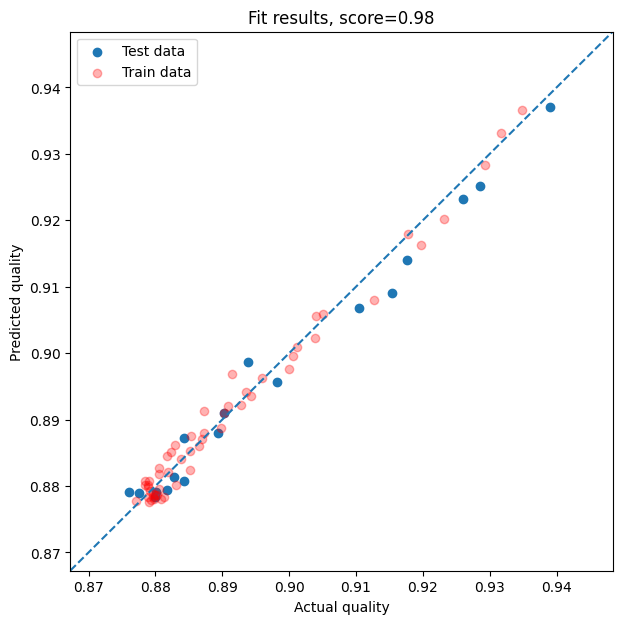

In [9]:
layer, head, feature = best_params
print(best_estimator.best_params_)
print(f"{layer, head, feature} is best params")
df = df_final.copy()
for thr in range(n_thrs):
    df[f"topological_val_{thr}"] = attentions[:, layer, head, feature, thr]
X = df.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df["finetune_result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)


plot_results(y_test, best_estimator.predict(X_test), y_train, best_estimator.predict(X_train))
print(f"Kendall rank coef: {kendalltau(y_test, best_estimator.predict(X_test)).statistic:.3f}")

In [10]:
import seaborn as sns


arr = np.array([
    [
        [
            scores[layer, head, feature]
            for feature in range(n_features) 
        ]
        for head in range(n_heads)
    ]
    for layer in range(n_layers)
])

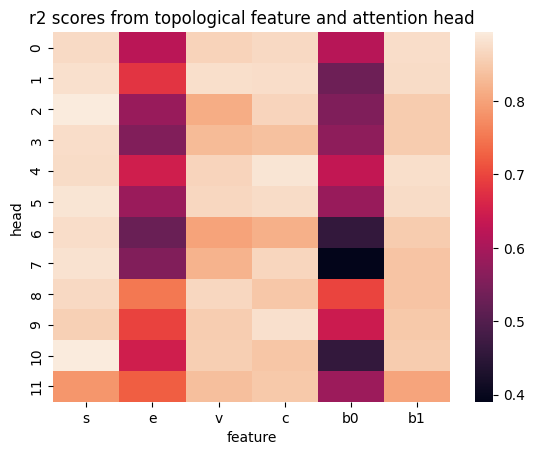

In [11]:
sns.heatmap(arr.mean(axis=0))
plt.title("r2 scores from topological feature and attention head")
plt.xlabel("feature")
plt.xticks(np.arange(0.5, 6.5, 1), ["s", "e", "v", "c", "b0", "b1"])
plt.ylabel("head");

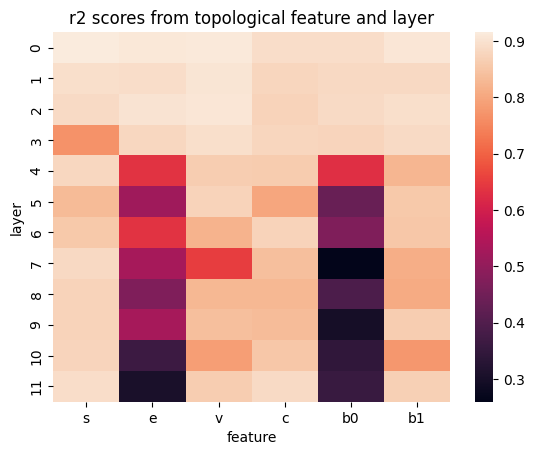

In [12]:
sns.heatmap(arr.mean(axis=1))
plt.title("r2 scores from topological feature and layer")
plt.xlabel("feature")
plt.xticks(np.arange(0.5, 6.5, 1), ["s", "e", "v", "c", "b0", "b1"])
plt.ylabel("layer");

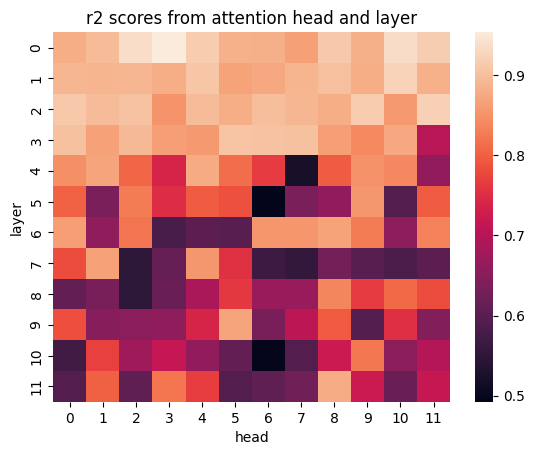

In [13]:
sns.heatmap(arr.mean(axis=2))
plt.title("r2 scores from attention head and layer")
plt.xlabel("head")
plt.ylabel("layer");

In [14]:
arr_kendal = np.array([
    [
        [
            scores_kendaltau[layer, head, feature]
            for feature in range(n_features) 
        ]
        for head in range(n_heads)
    ]
    for layer in range(n_layers)
])

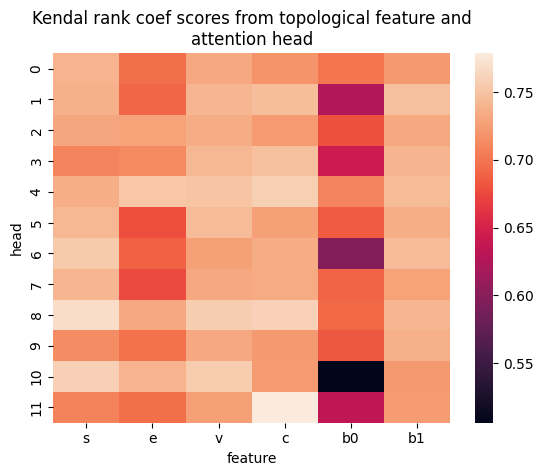

In [15]:
sns.heatmap(arr_kendal.mean(axis=0))
plt.title("Kendal rank coef scores from topological feature and\nattention head")
plt.xlabel("feature")
plt.xticks(np.arange(0.5, 6.5, 1), ["s", "e", "v", "c", "b0", "b1"])
plt.ylabel("head");

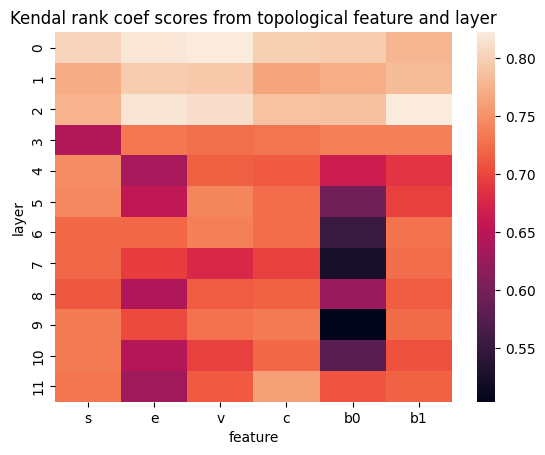

In [16]:
sns.heatmap(arr_kendal.mean(axis=1))
plt.title("Kendal rank coef scores from topological feature and layer")
plt.xlabel("feature")
plt.xticks(np.arange(0.5, 6.5, 1), ["s", "e", "v", "c", "b0", "b1"])
plt.ylabel("layer");

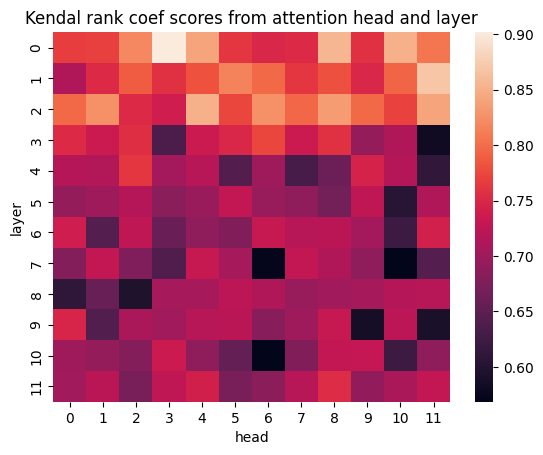

In [17]:
sns.heatmap(arr_kendal.mean(axis=2))
plt.title("Kendal rank coef scores from attention head and layer")
plt.xlabel("head")
plt.ylabel("layer");

In [54]:
data_finetune_glue = pd.read_csv("finetune_res_glue.csv", sep="\t", header=None, names=["name", "finetune_result"])
rename_checkpoint(data_finetune_glue, "name")

data_probing_glue = pd.read_csv("probing_results_glue.csv", sep="\t", header=None, names=["name", "probing_result"])
for probing_ds in ['CR', 'MR', 'MPQA', 'SUBJ', 'SST2', 'SST5', 'Depth', 'Tense', 'Length']:
    data_probing_glue[f"{probing_ds}_results"] = data_probing_glue["probing_result"].map(partial(extract, probing_ds))

data_probing_glue.drop("probing_result", axis=1, inplace=True)
rename_checkpoint(data_probing_glue, "name")
data_probing_glue

,name,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results,Depth_results,Tense_results,Length_results
0,bert-base-uncased,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584,0.2987,0.8835,0.5376
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385,0.2827,0.8849,0.5723
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-400,0.8106,0.7589,0.8527,0.9298,0.7963,0.4258,0.2826,0.8591,0.6368
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-720,0.8021,0.7446,0.8697,0.9272,0.7836,0.4095,0.2921,0.8615,0.5783
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7902,0.7295,0.8583,0.9174,0.7661,0.3932,0.2873,0.8447,0.5818
5,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7783,0.7269,0.8566,0.9154,0.7732,0.4000,0.2909,0.8335,0.5771
6,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7801,0.7160,0.8524,0.9063,0.7765,0.3919,0.2832,0.8215,0.5675
7,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7709,0.7072,0.8531,0.9071,0.7446,0.3873,0.2814,0.8141,0.5078
8,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7619,0.6954,0.8493,0.8986,0.7381,0.3792,0.2797,0.7955,0.4922
9,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.7640,0.7082,0.8549,0.9105,0.7551,0.3878,0.2738,0.8025,0.5603


In [49]:
features_path_glue = "attention_features_glue"

names = os.listdir(features_path)
features_glue = []
for name in names:
    file_path = f"{features_path}/{name}"
    with open(file_path, "rb") as file:
        model_features = np.load(file)
    features_glue.append(model_features)

features_glue = np.array(features_glue)
features_glue = features_glue.mean(axis=-2)
data_attentions_glue = pd.DataFrame({"name": names, "attention_features": features.tolist()})
rename_checkpoint(data_attentions_glue, "name")
data_attentions_glue

,name,attention_features
0,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-720,"[[[[264.0, 270.5, 270.75, 270.75, 270.75, 270...."
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.0, 270.5, 270.75, 270.75, 270.75, 270...."
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-560,"[[[[265.0, 270.5, 270.75, 270.75, 270.75, 270...."
...,...,...
67,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[264.5, 270.5, 270.75, 270.75, 270.75, 270...."
68,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.75, 270.75, 270.75, 270.75, 270.75, 27..."
69,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.25, 270.5, 270.75, 270.75, 270.75, 270..."
70,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,"[[[[266.25, 270.5, 270.75, 270.75, 270.75, 270..."


In [50]:
data_finetune_glue

,name,finetune_result
0,bert-base-uncased,0.824545
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.792905
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-160,0.744966
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-240,0.691275
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-320,0.691275
...,...,...
80,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.660827
81,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.647066
82,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.653243
83,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.647124


In [55]:
df_final_glue = pd.merge(data_finetune_glue, data_probing_glue, on="name")
df_final_glue = pd.merge(df_final_glue, data_attentions_glue, on="name")
df_final_glue

,name,finetune_result,CR_results,MR_results,MPQA_results,SUBJ_results,SST2_results,SST5_results,Depth_results,Tense_results,Length_results,attention_features
0,bert-base-uncased,0.824545,0.8665,0.8194,0.8796,0.9570,0.8666,0.4584,0.2987,0.8835,0.5376,"[[[[267.0, 270.75, 270.75, 270.75, 270.75, 270..."
1,finetuned-scrumbled-wikitext2-3e-4-checkpoint-80,0.792905,0.8379,0.7878,0.8827,0.9436,0.8429,0.4385,0.2827,0.8849,0.5723,"[[[[263.75, 270.5, 270.75, 270.75, 270.75, 270..."
2,finetuned-scrumbled-wikitext2-3e-4-checkpoint-400,0.697987,0.8106,0.7589,0.8527,0.9298,0.7963,0.4258,0.2826,0.8591,0.6368,"[[[[266.5, 270.75, 270.75, 270.75, 270.75, 270..."
3,finetuned-scrumbled-wikitext2-3e-4-checkpoint-720,0.670123,0.8021,0.7446,0.8697,0.9272,0.7836,0.4095,0.2921,0.8615,0.5783,"[[[[264.0, 270.5, 270.75, 270.75, 270.75, 270...."
4,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.666565,0.7902,0.7295,0.8583,0.9174,0.7661,0.3932,0.2873,0.8447,0.5818,"[[[[266.5, 270.75, 270.75, 270.75, 270.75, 270..."
5,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.663722,0.7783,0.7269,0.8566,0.9154,0.7732,0.4000,0.2909,0.8335,0.5771,"[[[[265.0, 270.5, 270.75, 270.75, 270.75, 270...."
6,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.651615,0.7801,0.7160,0.8524,0.9063,0.7765,0.3919,0.2832,0.8215,0.5675,"[[[[265.0, 270.5, 270.75, 270.75, 270.75, 270...."
7,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.644343,0.7709,0.7072,0.8531,0.9071,0.7446,0.3873,0.2814,0.8141,0.5078,"[[[[265.5, 270.5, 270.75, 270.75, 270.75, 270...."
8,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.630627,0.7619,0.6954,0.8493,0.8986,0.7381,0.3792,0.2797,0.7955,0.4922,"[[[[266.75, 270.75, 270.75, 270.75, 270.75, 27..."
9,finetuned-scrumbled-wikitext2-3e-4-checkpoint-...,0.632970,0.7640,0.7082,0.8549,0.9105,0.7551,0.3878,0.2738,0.8025,0.5603,"[[[[264.75, 270.5, 270.75, 270.75, 270.75, 270..."


Kendall rank coef: 0.9696969697


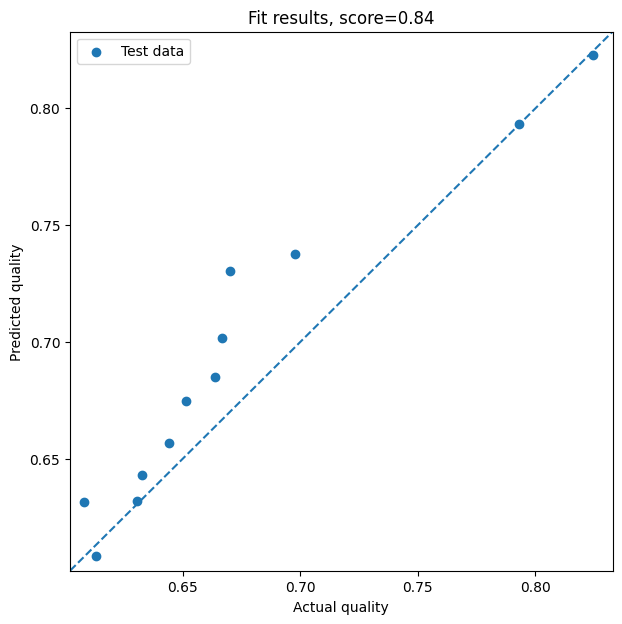

In [82]:
layer, head, feature = best_params
X = df_final_glue.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df_final_glue["finetune_result"]
plot_results(y, (res_no_topoligical.predict(X) - 0.7) * 3.3)
print(f"Kendall rank coef: {kendalltau(y, res_no_topoligical.predict(X)).statistic:.10f}")

Kendall rank coef: 0.9696969697


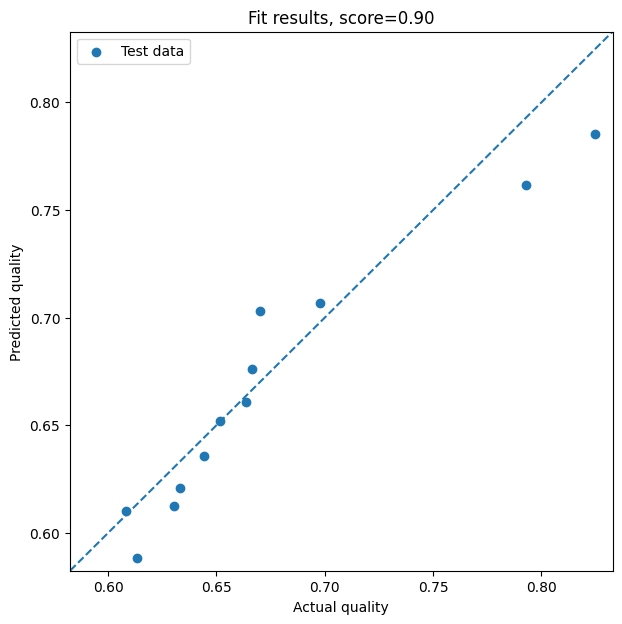

In [80]:
df = df_final_glue.copy()
attentions = df["attention_features"]
attentions = np.array(attentions.tolist())
for thr in range(n_thrs):
    df[f"topological_val_{thr}"] = attentions[:, layer, head, feature, thr]
X = df.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df["finetune_result"]
plot_results(y, (reg.predict(X) - 0.7) * 3.3)
print(f"Kendall rank coef: {kendalltau(y, (reg.predict(X))).statistic:.10f}")

In [23]:
from tqdm.notebook import tqdm
import warnings


n_layers = 12
n_heads = 12
n_features = 6
n_thrs = 6
attentions = df_final["attention_features"]
attentions = np.array(attentions.tolist())
assert attentions.shape[1:] == (n_layers, n_heads, n_features, n_thrs)
best_score = -2
scores = {}
scores_kendaltau = {}
df = df_final.copy()
new_cols = {}
for layer in (range(n_layers)):
    for head in (range(n_heads)):
        for feature in range(n_features):
            for thr in range(n_thrs):
                new_cols[f"topological_val_{layer}_{head}_{feature}_{thr}"] = attentions[:, layer, head, feature, thr]
df = pd.concat([df, pd.DataFrame(new_cols)], axis=1)
X = df.drop(["name", "finetune_result", "attention_features"], axis=1)
y = df["finetune_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

grid_params = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
}
reg_all_feat = GridSearchCV(Lasso(), grid_params, cv=5, verbose=False, scoring="r2")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    res_all_feat = reg_all_feat.fit(X_train, y_train)
tau = kendalltau(y_test, res_all_feat.predict(X_test)).statistic
print(f"R^2 score: {res_all_feat.best_score_:.3f}")
print(res_all_feat.best_params_)

R^2 score: 0.951
{'alpha': 0.001}


Kendall rank coef: 0.856


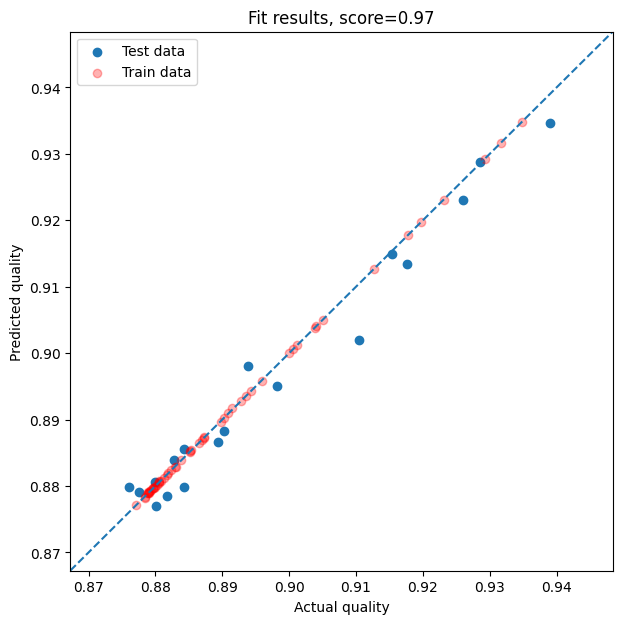

In [24]:
plot_results(y_test, res_all_feat.predict(X_test), y_train, res_all_feat.predict(X_train))
print(f"Kendall rank coef: {kendalltau(y_test, res_all_feat.predict(X_test)).statistic:.3f}")